# Introduction

Telco Customer Churn Prediction

Customer churn refers to the loss of clients or subscribers who discontinue their relationship with a company.
In the telecommunications sector, where customers can easily switch among multiple providers, the annual churn rate typically ranges from 15% to 25%.

Because retaining existing customers is significantly more cost-effective than acquiring new ones, identifying potential churners in advance is a critical business priority.
By leveraging customer data—such as service usage, purchase behavior, and interactions across digital and offline channels—companies can develop targeted retention strategies to improve loyalty and reduce attrition.

Effectively managing churn not only safeguards market share but also drives profitability and sustainable growth.

Objectives

This analysis aims to:

1) the percentage of customers have churned versus those who remain active?

2) Are there noticeable churn patterns related to gender?

3) Do certain types of services have higher churn rates than others?

4) Which services generate the most profit?

5) Which customer features and behaviors are most predictive of churn?

6) And additional insights that may emerge during the analysis.

# Importing Essential Libraries and ingesting data

In [ ]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Missing values visualization
import missingno as msno

# Warning configuration
import warnings
warnings.filterwarnings(action='ignore')

# Visualization settings
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

# color palette
custom_palette = sns.color_palette("coolwarm")
sns.set_palette(custom_palette)


In [ ]:
# Preprocessing & Feature Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Core Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)

# Additional ML Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Gradient Boosting Alternatives
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model Evaluation & Validation Tools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    f1_score, roc_curve, confusion_matrix, classification_report
)

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Understanding the data

In [ ]:
# overview of the dataset to verify columns and data format.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Summary of the table:

1) Customer account information – includes details such as tenure, contract type, paperless billing status, payment method, monthly charges, and total charges.

2) Subscribed services – shows which services each customer has signed up for, ranging from phone service to streaming movies.

3) Customer demographics – provides demographic details such as gender, senior citizen status, partner, and dependents.

4) Churn column – located on the far right, it indicates whether a customer discontinued the service within the last month (“Yes” = churned).

5) Customer ID – each record in the dataset is uniquely identified by a customer ID.

In [ ]:
# Check the number of rows and columns in the dataset
df.shape

(7043, 21)

In [ ]:
# Get a concise summary of the DataFrame including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# List all column names as an array
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Visualize missing values**

# Visualizing missing values

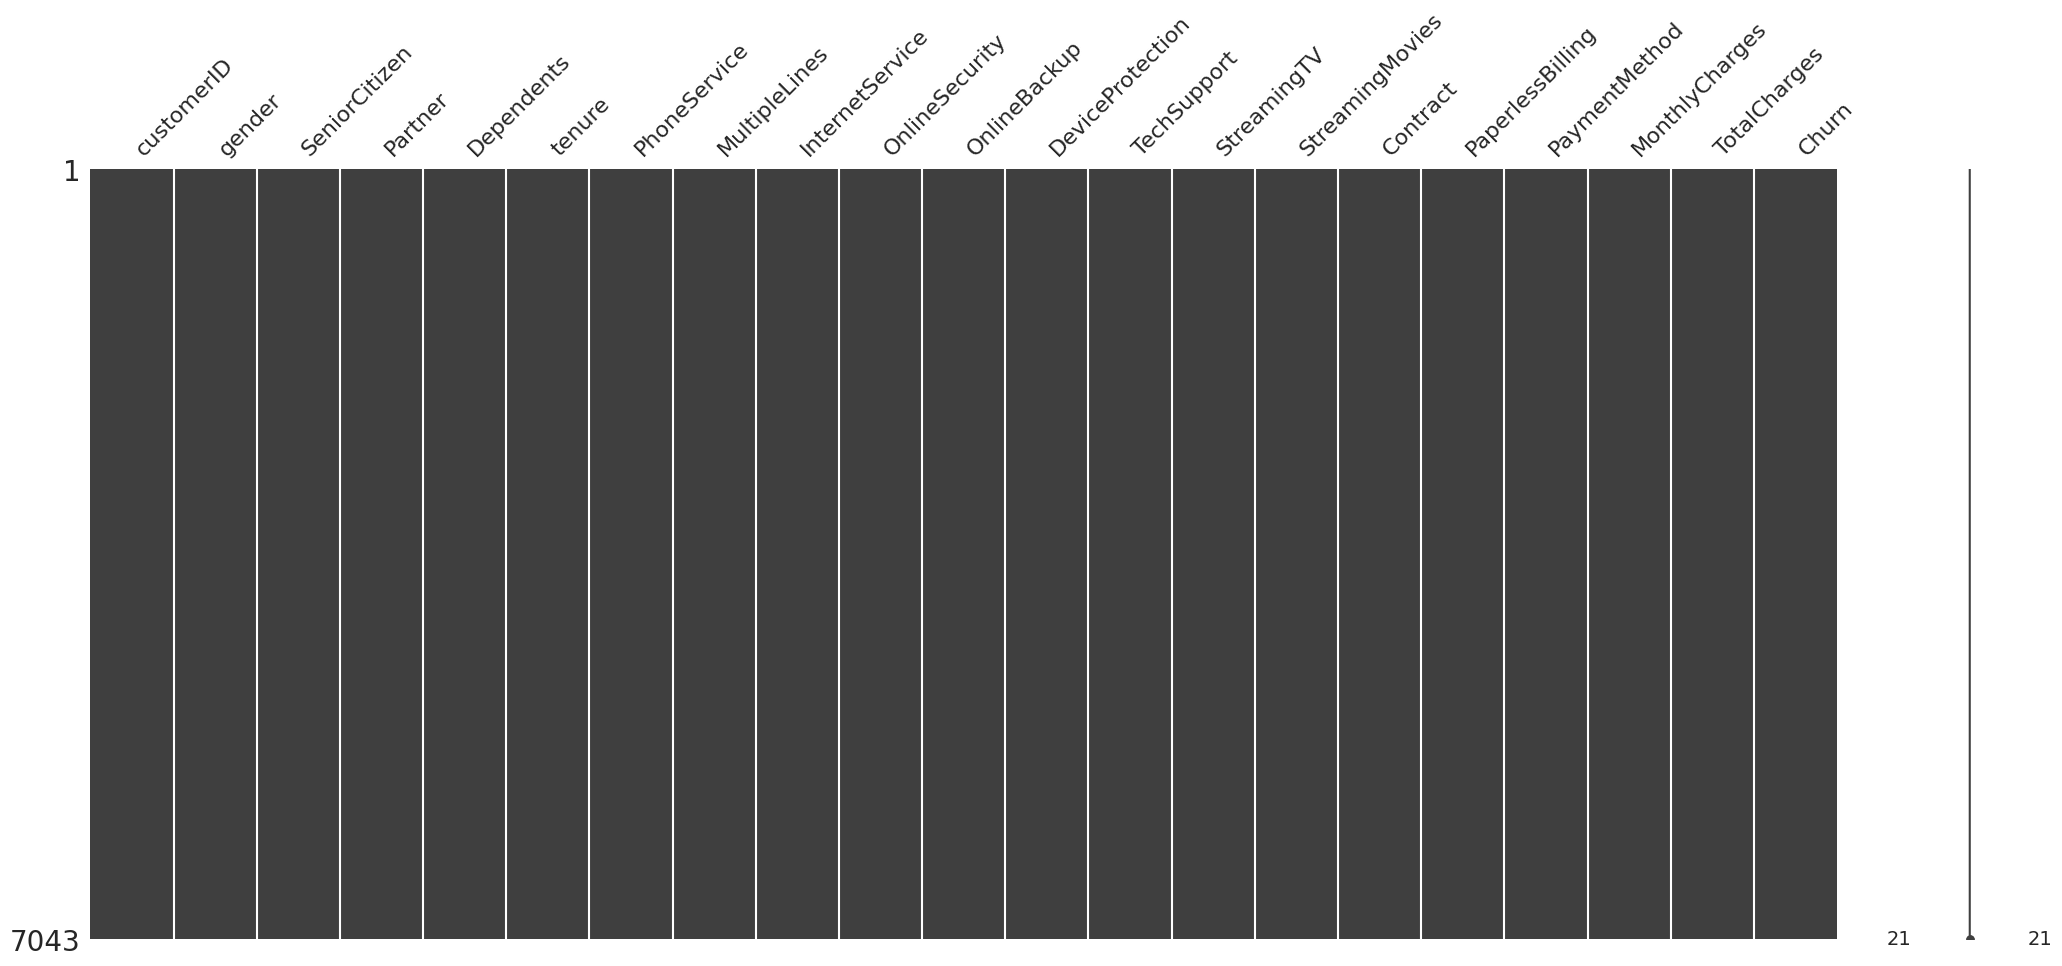

In [ ]:
#Visualizing the dataset to check for missing values.
msno.matrix(df);


> Looking at the visualized dataset, there are no empty spaces and the pattern is consistent. This indicates that there are no missing values in the dataset.

# Data manipulation

In [ ]:
df = df.loc[:, df.columns != 'customerID']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Replace blank strings with NaN, then convert to numeric safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check the number of missing values per column
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


> The above indicates that the TotalCharges column has 11 NaN values, while the other columns have no missing values.

In [ ]:
# Select rows where 'TotalCharges' column has missing values (NaN)
df.query("TotalCharges != TotalCharges")


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


> The Tenure column shows 0 for the rows where TotalCharges is NaN.
Next, I will check if there are any 0 values in the Tenure column.

In [ ]:
# Select the indices of rows where the 'tenure' column has a value of 0
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

> Since there are only 11 rows with missing values, they represent a very small portion of the entire dataset. Therefore, I will remove these rows, as doing so will not significantly affect the overall analysis or model performance.

In [ ]:
# Remove all rows where the tenure value is 0
df = df[df['tenure'] != 0]
df[df['tenure'] == 0].index


Index([], dtype='int64')

> Filling missing TotalCharges values with the mean helps maintain data consistency without removing valuable rows.
Since TotalCharges is a numeric variable, using the mean is a simple and reasonable approach.

In [ ]:
# Replace NaN values with the mean of TotalCharges
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [ ]:
# Count the number of missing (NaN) values in each column
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Convert 0/1 in 'SeniorCitizen' column to 'No'/'Yes' for readability
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1: "Yes"})
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display summary statistics for the "InternetService" column
df["InternetService"].describe()

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [ ]:
# Display summary statistics for selected numerical columns
df.iloc[:, [df.columns.get_loc('tenure'), df.columns.get_loc('MonthlyCharges'), df.columns.get_loc('TotalCharges')]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Data visualization

In [ ]:
# Create a pie chart for gender
fig1 = px.pie(df, names='gender', title='Gender Distribution', hole=0.4)

# Create a pie chart for churn
fig2 = px.pie(df, names='Churn', title='Churn Distribution', hole=0.4)

fig1.show()
fig2.show()

> About 26.6% of the customer base churned to a competitor.
Gender-wise, the customers are almost evenly split: 49.5% female and 50.5% male.


In [ ]:
# Count customers who did not churn, grouped by gender
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()


,Churn
gender,
Female,2544
Male,2619


In [ ]:
# Alternative: groupby and size for churned customers
df[df["Churn"] == "Yes"].groupby("gender").size()


,0
gender,
Female,939
Male,930


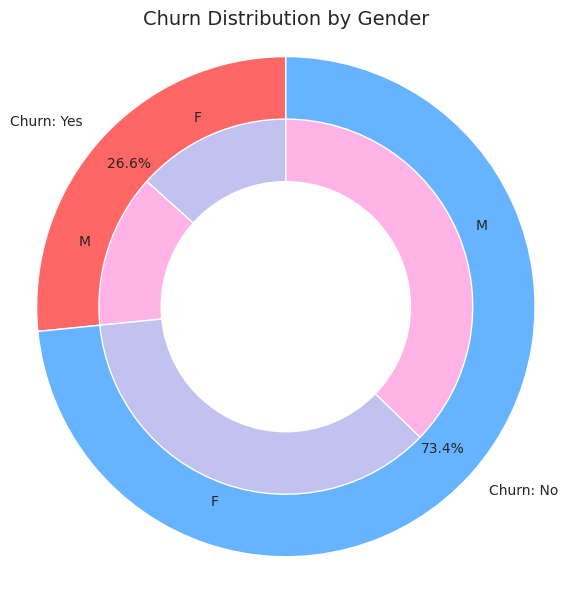

In [ ]:
plt.figure(figsize=(6,6))

# Outer donut (overall churn distribution)
labels_churn = ["Churn: Yes", "Churn: No"]
sizes_churn = [1869, 5163]
colors_churn = ['#ff6666', '#66b3ff']

# Inner donut (gender-wise churn distribution)
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']

# Plot outer donut
plt.pie(
    sizes_churn,
    labels=labels_churn,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_churn,
    radius=1.2,
    pctdistance=0.85
)

# Plot inner donut
plt.pie(
    sizes_gender,
    labels=labels_gender,
    startangle=90,
    colors=colors_gender,
    radius=0.9
)

# Draw white circle in the center to create donut effect
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(centre_circle)

# Add title and format layout
plt.title('Churn Distribution by Gender', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()



> There is a very small variation in the percentage of customers changing service providers, with male and female customers exhibiting comparable patterns.

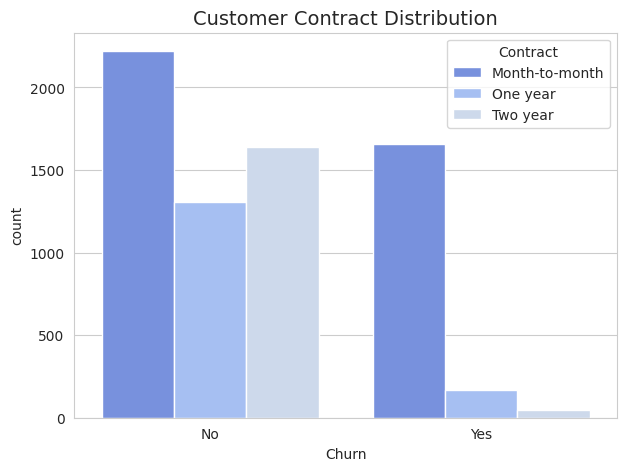

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(7,5))

# Create a grouped bar chart showing the count of Churn values for each Contract type
sns.countplot(data=df, x='Churn', hue='Contract')

# Add title to the chart
plt.title("Customer Contract Distribution", fontsize=14)

# Display the plot
plt.show()


> Approximately three-quarters of customers with a Month-to-Month contract churned, whereas only 13% of One-Year and 3% of Two-Year contract holders did so.

In [ ]:
# Create a donut chart to visualize distribution of payment methods
# The 'hole' parameter makes the pie chart look like a donut
fig = px.pie(
    df,
    names='PaymentMethod',
    title='Payment Method Distribution',
    hole=0.3
)

# Display the chart
fig.show()


In [ ]:
# Create stacked histogram to visualize how payment methods differ between churned and non-churned customers
fig = px.histogram(
    df,
    x="Churn",
    color="PaymentMethod",
    title="<b>Customer Payment Method Distribution w.r.t. Churn (Stacked)</b>",
    barmode="stack"
)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


> Most customers who churned used Electronic Check as their payment method.
In contrast, those using Credit Card Auto-Pay, Bank Transfer, or Mailed Check were less likely to churn.

In [ ]:
# Display unique values in the 'InternetService' column using drop_duplicates()
df["InternetService"].drop_duplicates().values

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
# Group by InternetService and Churn for male customers, then count occurrences
df[df["gender"]=="Male"].groupby(["InternetService", "Churn"]).size()


InternetService  Churn
DSL              No       992
                 Yes      240
Fiber optic      No       910
                 Yes      633
No               No       717
                 Yes       57
dtype: int64

In [ ]:
# Count the number of female customers for each combination of InternetService and Churn
df[df["gender"]=="Female"].groupby(["InternetService", "Churn"]).size()


InternetService  Churn
DSL              No       965
                 Yes      219
Fiber optic      No       889
                 Yes      664
No               No       690
                 Yes       56
dtype: int64

In [ ]:
# Group the dataset by InternetService, Churn, and Gender and count the occurrences
grouped = df.groupby(["InternetService", "Churn", "gender"]).size().reset_index(name="count")

# Plot using Plotly
fig = go.Figure()

for service in grouped["InternetService"].unique():
    temp = grouped[grouped["InternetService"] == service]
    fig.add_trace(go.Bar(
        x=temp["Churn"] + " : " + temp["gender"],  # combine Churn and Gender for x-axis
        y=temp["count"],
        name=service
    ))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
fig.show()


> Many customers subscribe to Fiber optic internet, and a noticeable portion of them have churned, which could indicate dissatisfaction with this service type.
In contrast, most customers use DSL, and they tend to churn less frequently compared to those using Fiber optic.

In [ ]:
# Count number of customers by Churn and Dependents
grouped = df.groupby(["Churn", "Dependents"]).size().reset_index(name="count")

# Plot grouped bar chart
fig = go.Figure()

for dep in grouped["Dependents"].unique():
    temp = grouped[grouped["Dependents"] == dep]
    fig.add_trace(go.Bar(
        x=temp["Churn"],
        y=temp["count"],
        name=dep
    ))

fig.update_layout(
    title="<b>Dependents distribution</b>",
    barmode="group",
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


In [ ]:
# Convert Partner values to readable labels if needed
df["Partner"] = df["Partner"].replace({0: "No", 1: "Yes"})

# Aggregate counts by Churn and Partner
df_count = df.groupby(["Churn", "Partner"]).size().reset_index(name="count")

# Create a grouped bar chart
fig = px.bar(
    df_count,
    x="Churn",         # X-axis: Churn status
    y="count",         # Y-axis: number of customers
    color="Partner",   # Color by Partner status
    barmode="group",   # Bars side-by-side for each Churn category
    title="<b>Churn distribution w.r.t. Partner</b>"
)

# Adjust layout for better appearance
fig.update_layout(
    width=700,
    height=500,
    bargap=0.1
)

# Display chart
fig.show()

> Customers with no partners are more likely to churn

In [ ]:
# Convert numeric values (0/1) to categorical labels ("No"/"Yes")
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1: "Yes"})

# Aggregate counts by Churn and SeniorCitizen
df_count = df.groupby(["Churn", "SeniorCitizen"]).size().reset_index(name="count")

# Create stacked bar chart
fig = px.bar(
    df_count,
    x="Churn",               # x-axis variable
    y="count",               # bar height
    color="SeniorCitizen",   # bar color based on category
    title="<b>Churn distribution w.r.t. Senior Citizen</b>",
    barmode="stack"          # display bars stacked
)

# Adjust chart layout for cleaner appearance
fig.update_layout(
    width=700,               # figure width
    height=500,              # figure height
    bargap=0.1               # small gap between bars
)

# Display the figure
fig.show()

> It shows that senior citizens represent a small portion of the customer base, but most of them tend to churn.

In [ ]:
# Convert numeric or boolean OnlineSecurity values to "Yes"/"No" strings
df["OnlineSecurity"] = df["OnlineSecurity"].replace({0: "No", 1: "Yes"})

# Aggregate counts manually
df_count = df.groupby(["Churn", "OnlineSecurity"]).size().reset_index(name="count")

# Color mapping for Yes/No
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create grouped bar chart
fig = px.bar(
    df_count,
    x="Churn",
    y="count",
    color="OnlineSecurity",
    barmode="group",
    title="<b>Churn w.r.t Online Security</b>",
    color_discrete_map=color_map
)

# Layout adjustments
fig.update_layout(width=700, height=500, bargap=0.1)

# Display figure
fig.show()

> Most customers without online security tend to churn.

In [ ]:
# Convert values in PaperlessBilling to readable string labels
df["PaperlessBilling"] = df["PaperlessBilling"].replace({0: "No", 1: "Yes"})

# Aggregate counts of customers by Churn and PaperlessBilling
df_count = df.groupby(["Churn", "PaperlessBilling"]).size().reset_index(name="count")

# Create stacked bar chart using Plotly Express
fig = px.bar(
    df_count,
    x="Churn",                    # X-axis: Churn status
    y="count",                    # Y-axis: number of customers
    color="PaperlessBilling",     # Bar color based on PaperlessBilling
    title="<b>Churn distribution w.r.t. Paperless Billing</b>",
    barmode="stack"               # Stacked bar mode
)

# Adjust figure layout for better visuals
fig.update_layout(
    width=700,   # Chart width
    height=500,  # Chart height
    bargap=0.1   # Small gap between bars
)

# Display the chart
fig.show()

> Customers who use paperless billing show a higher tendency to churn.

In [ ]:
# Convert numeric TechSupport to string labels
df["TechSupport"] = df["TechSupport"].replace({0: "No", 1: "Yes"})

# Aggregate counts
df_count = df.groupby(["Churn", "TechSupport"]).size().reset_index(name="count")

# Create grouped bar chart
fig = px.bar(
    df_count,
    x="Churn",
    y="count",
    color="TechSupport",
    barmode="group",
    title="<b>Churn distribution w.r.t. TechSupport</b>"
)

# Layout adjustment
fig.update_layout(width=700, height=500, bargap=0.1)

# Show figure
fig.show()

> Customers without TechSupport are more likely to churn.

In [ ]:
# Convert numeric PhoneService values to string labels
df["PhoneService"] = df["PhoneService"].replace({0: "No", 1: "Yes"})

# Aggregate counts by Churn and PhoneService
df_count = df.groupby(["Churn", "PhoneService"]).size().reset_index(name="count")

# Create stacked bar chart
fig = px.bar(
    df_count,
    x="Churn",               # X-axis: Churn status
    y="count",               # Y-axis: number of customers
    color="PhoneService",    # Bar color based on PhoneService status
    barmode="stack",         # Stack the bars
    title="<b>Churn distribution w.r.t. Phone Service</b>"
)

# Adjust layout for better visuals
fig.update_layout(
    width=700,
    height=500,
    bargap=0.1
)

# Display the chart
fig.show()

> Only a handful of customers lack phone service — yet one-third of them end up churning.

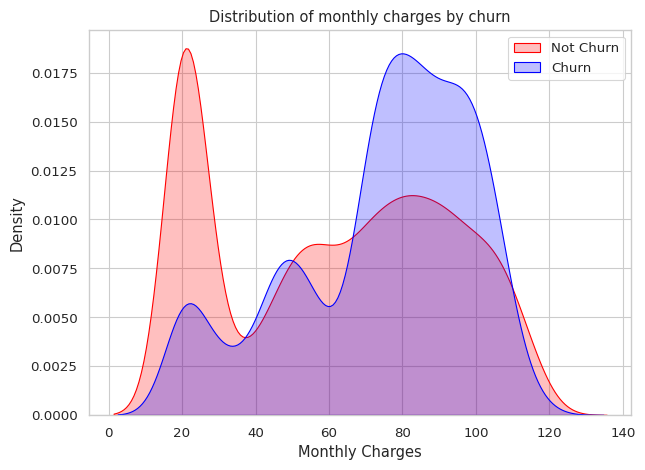

In [ ]:
# Set Seaborn context for consistent font and scaling
sns.set_context("paper", font_scale=1.1)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Loop through Churn categories and plot KDE for each
for churn_value, color in zip(["No", "Yes"], ["Red", "Blue"]):
    sns.kdeplot(
        data=df[df["Churn"] == churn_value],   # filter data for each churn value
        x="MonthlyCharges",                    # variable to plot on x-axis
        fill=True,                             # same as shade=True
        color=color,                           # line/fill color
        label="Not Churn" if churn_value == "No" else "Churn",  # legend label
        ax=ax                                  # plot on the same axis
    )

# Set axis labels and title
ax.set_ylabel("Density")
ax.set_xlabel("Monthly Charges")
ax.set_title("Distribution of monthly charges by churn")

# Add legend
ax.legend(loc="upper right")

# Display the plot
plt.show()



> The probability of churn increases as Monthly Charges rise.

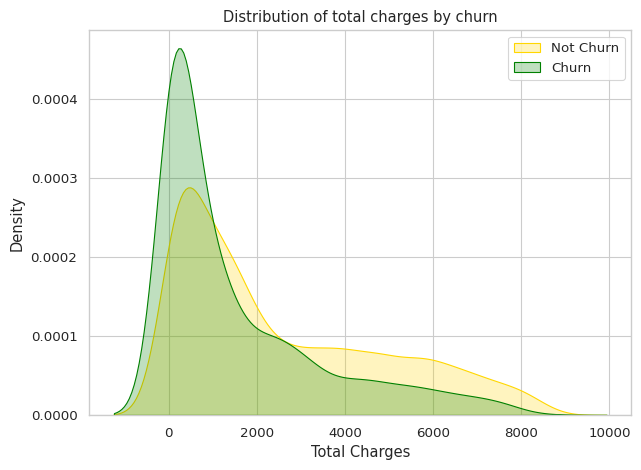

In [ ]:
# Set visual context for consistent styling
sns.set_context("paper", font_scale=1.1)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Loop through Churn categories and plot KDE for each
for churn_value, color in zip(["No", "Yes"], ["Gold", "Green"]):
    sns.kdeplot(
        data=df[df["Churn"] == churn_value],   # filter data by Churn status
        x="TotalCharges",                      # variable to plot
        fill=True,                             # same as shade=True
        color=color,                           # fill color for each curve
        label="Not Churn" if churn_value == "No" else "Churn",  # legend label
        ax=ax                                  # plot on the same axis
    )

# Add labels and title
ax.set_ylabel("Density")
ax.set_xlabel("Total Charges")
ax.set_title("Distribution of total charges by churn")

# Add legend
ax.legend(loc="upper right")

# Display plot
plt.show()


It shows how the total charge amount relates to customer churn.
Customers who have churned are mostly concentrated in the lower TotalCharges range.

This indicates that customers with lower total charges — typically those who have been with the company for a shorter period — are more likely to churn.

In [ ]:
# Create box plot
fig = px.box(
    data_frame=df,
    x="Churn",
    y="tenure",
    title="<b>Tenure vs Churn</b>",
    width=750,
    height=600
)

# Update axis titles (identical to original)
fig.update_layout(
    yaxis_title="Tenure (Months)",
    xaxis_title="Churn",
    autosize=True,
    title_font=dict(size=25, family="Courier")
)

# Display the figure
fig.show()


> Newer customers show a higher tendency to churn.

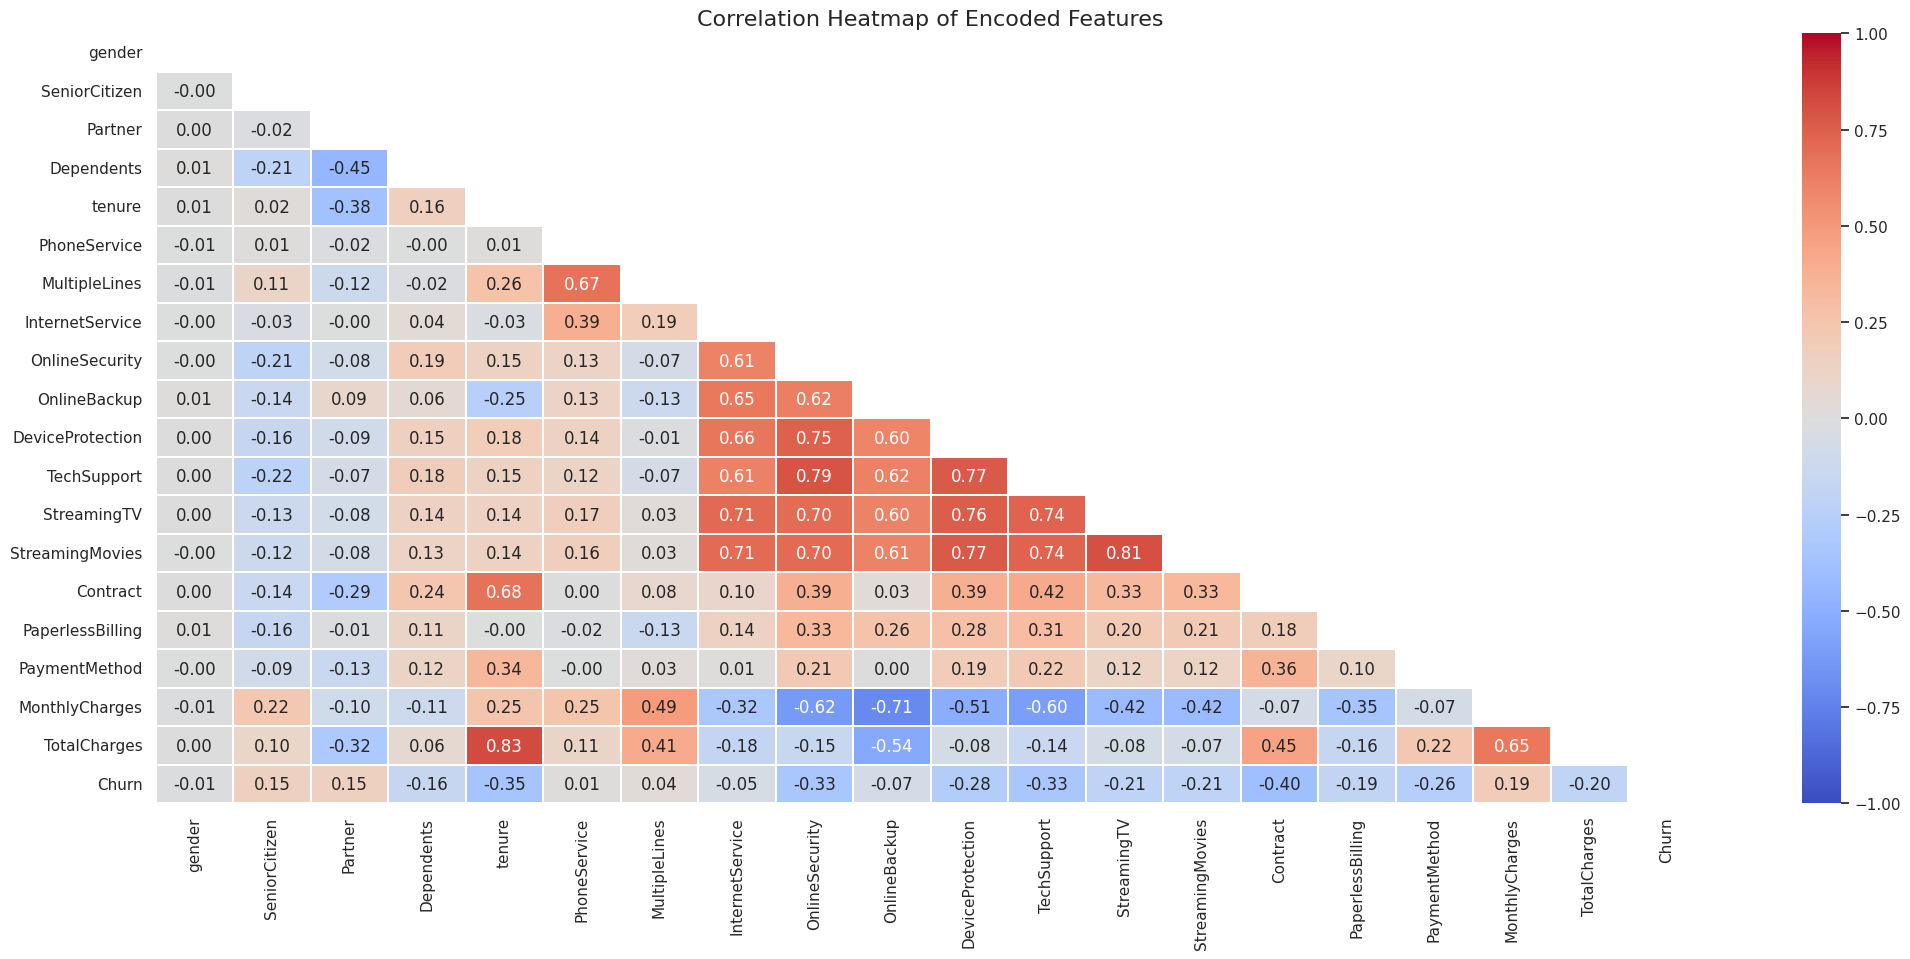

In [ ]:
# Convert categorical columns to numeric codes for correlation
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include=['object', 'category']).columns:
    encoded_df[col] = pd.factorize(encoded_df[col])[0]

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones(corr_matrix.shape, dtype=bool))

# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set(style="white")

# Draw heatmap
sns.heatmap(
    data=corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.2,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.columns
)

plt.title("Correlation Heatmap of Encoded Features", fontsize=16)
plt.show()

# Preprocessing the data

Breaking the data into training and testing samples

In [ ]:
def object_to_int(series):
    if series.dtype == 'object':
        return series.astype('category').cat.codes
    return series

In [ ]:
for col in df.columns:
    df[col] = object_to_int(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
corr_df = df.corr().loc[:, ['Churn']].sort_values(by='Churn', ascending=False)
corr_df

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1400x700 with 0 Axes>

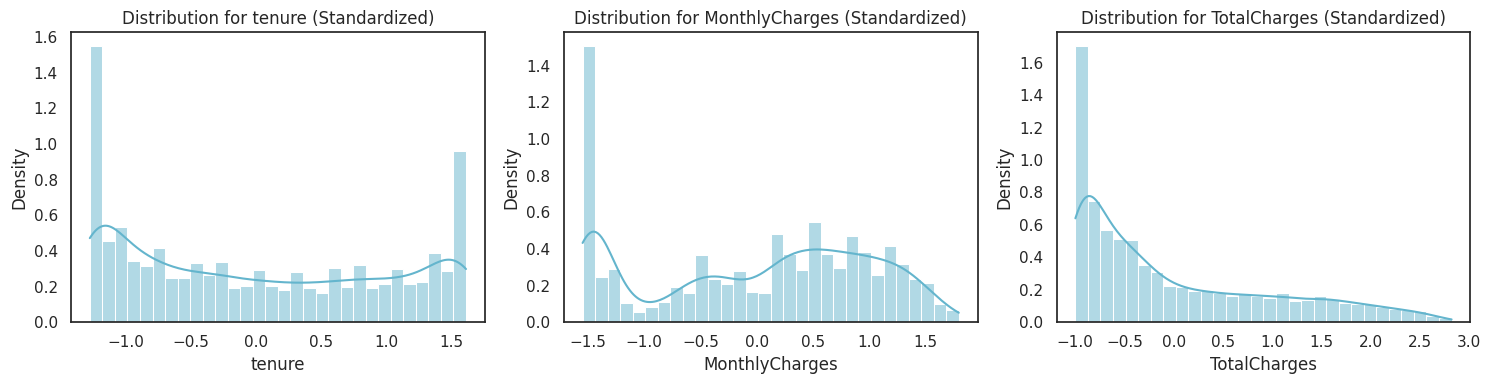

In [ ]:
# Standardize numerical features
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'Churn']

df_std = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols].astype('float64')),
    columns=num_cols
)

# Define numeric columns to visualize
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loop through each column and axis
for i, feat in enumerate(numeric_cols):
    sns.histplot(
        df_std[feat],
        ax=axes[i],          # plot on each subplot
        color='c',
        kde=True,            # add density curve
        stat='density',      # y-axis shows density
        bins=30,
        edgecolor=None
    )
    axes[i].set_title(f"Distribution for {feat} (Standardized)")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Density")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

> To bring the numerical features to the same scale, I will use StandardScaler since their ranges differ.

# Standardization of numerical attributes

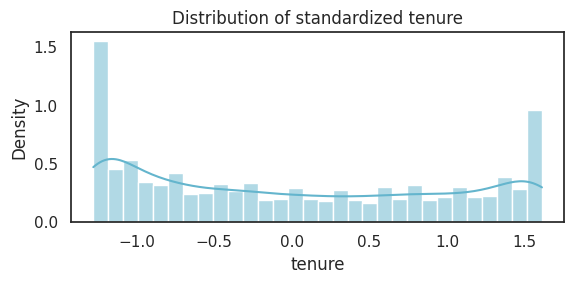

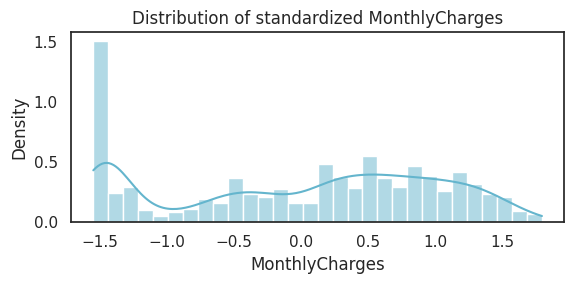

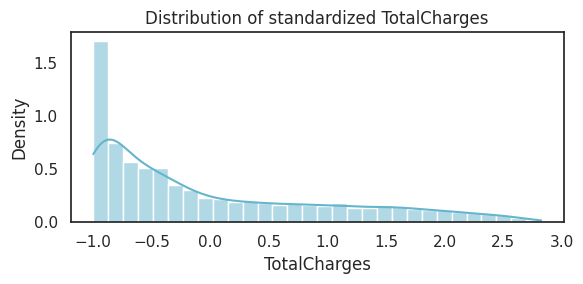

In [ ]:
# choose numeric columns (exclude target column)
numerical_cols = num_cols  # keep the same name as original

# handle missing values BEFORE scaling (either drop or fill; below we drop rows with NaN in numeric cols)
df_clean = df[num_cols].dropna()               # -> ensures scaler sees same data as original distplot

# scale (StandardScaler) and build dataframe with same column names
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_clean.astype('float64'))
df_std = pd.DataFrame(scaled_values, columns=num_cols, index=df_clean.index)

# Plot each feature with histogram (density) + KDE — reproduces seaborn.distplot behavior
for feat in numerical_cols:
    plt.figure(figsize=(6,3))
    # key: stat='density' -> y-axis is density (not raw counts), kde=True -> overlay density curve
    sns.histplot(df_std[feat], stat='density', kde=True, bins=30, color='c', element='bars')
    plt.title(f'Distribution of standardized {feat}')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

In [ ]:
# Make a copy to avoid modifying original df directly
df_encoded = df.copy()

# Encode only object columns
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

df = df_encoded
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


> To ensure the numerical features are on the same scale, I will use StandardScaler due to their differing ranges.

In [ ]:
# Features / Target split
y = df['Churn'].values
X = df.drop(columns='Churn')

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=40
)

# Define categorical and numerical column groups
categorical_ohe = ['PaymentMethod', 'Contract', 'InternetService']
categorical_le = [col for col in X_train.columns if col not in num_cols + categorical_ohe]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric features (copy to avoid modifying original directly)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for column in num_cols:
    X_train_scaled[column] = scaler.fit_transform(X_train[[column]])
    X_test_scaled[column] = scaler.transform(X_test[[column]])


# Machine Learning Model Evaluations and Predictions

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy manually
accuracy_knn = (y_pred == y_test).mean()
print("KNN accuracy:", accuracy_knn)


KNN accuracy: 0.7819905213270142


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)

def show_classification_result(y_true, y_pred):
    print(classification_report(y_true, y_pred))

show_classification_result(y_test, predicted_y)



              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



**SVC**

In [ ]:
# Train the model
svc_model = SVC(random_state=1, probability=True)
svc_model.fit(X_train, y_train)

# Predict on test data
y_pred = svc_model.predict(X_test)

# Compute accuracy
accuracy_svc = accuracy_score(y_test, y_pred)

round(accuracy_svc, 4)

SVM accuracy is: 0.7341232227488151


In [ ]:
# Train the model
svc_model = SVC(random_state=1, probability=True)
svc_model.fit(X_train, y_train)

# Make predictions
predicted_y = svc_model.predict(X_test)

# Define a function to show the classification report
def show_classification_result(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Display results
show_classification_result(y_test, predicted_y)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



Random Forest

In [ ]:
def train_and_evaluate_rf(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(
        n_estimators=500,
        oob_score=True,
        n_jobs=-1,
        random_state=50,
        max_features="sqrt",
        max_leaf_nodes=30
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred), 4)
    print(acc)
    return model, acc

model_rf, accuracy_rf = train_and_evaluate_rf(X_train, X_test, y_train, y_test)


0.8137


In [ ]:
# Train the model
model_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Make predictions
predicted_y = model_rf.predict(X_test)

# Define a function to show the classification report
def show_classification_result(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Display results
show_classification_result(y_test, predicted_y)


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



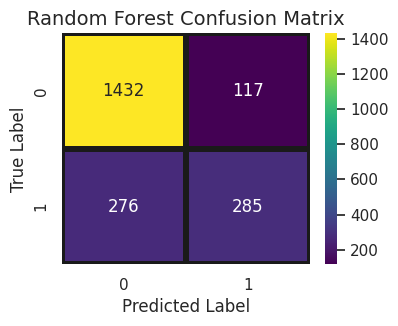

In [ ]:
# Train the Random Forest model
model_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Generate confusion matrix (identical numeric result)
cm = confusion_matrix(y_test, prediction_test)

# Convert to DataFrame
cm_df = pd.DataFrame(cm)

# Visualize as heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis',
            linecolor='k', linewidths=3)

plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

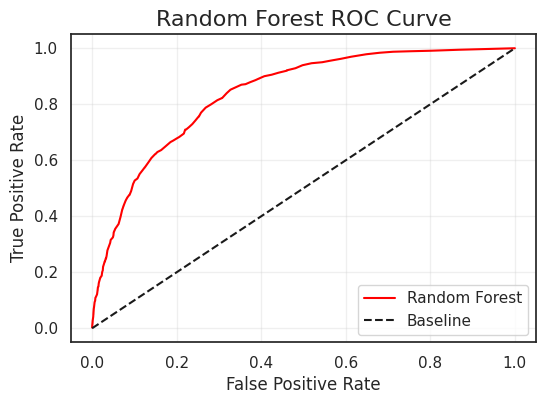

In [ ]:
# Train the model
rf_model = RandomForestClassifier(random_state=40)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Create ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)

# Create DataFrame for ROC visualization
roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})

plt.figure(figsize=(6, 4))
sns.lineplot(data=roc_df, x='False Positive Rate', y='True Positive Rate', color='red', label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')  # reference line

plt.title("Random Forest ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Logistic Regression

In [ ]:
# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

round(accuracy_lr, 4)

0.8043

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train (fit) the model using the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Display the classification report (precision, recall, f1-score, accuracy)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train (fit) the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Display the classification report (precision, recall, f1-score, accuracy)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.73      0.73      2110



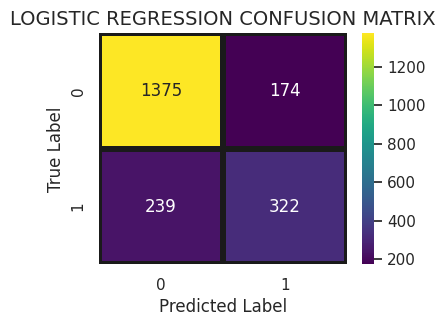

In [ ]:
# Ensure predictions exist
lr_pred = lr_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Keep identical numeric values by using the same matrix directly
cm_df = pd.DataFrame(cm)

# Visualize
plt.figure(figsize=(4,3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis',
            linecolor='k', linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

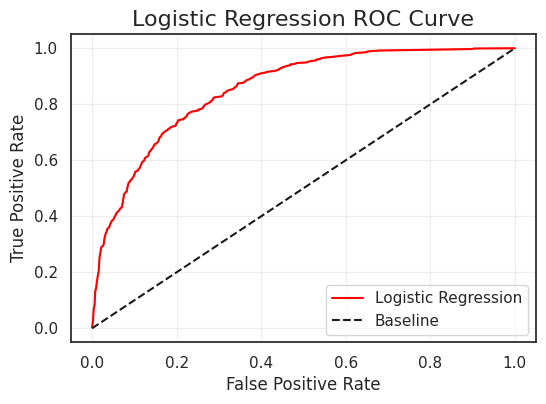

In [ ]:
# Train the model
lr_model = LogisticRegression(random_state=40)
lr_model.fit(X_train, y_train)

# Predict probabilities for the positive class
lr_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Create ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)

# Create DataFrame for ROC visualization
roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})

# Plot ROC curve
plt.figure(figsize=(6, 4))
sns.lineplot(data=roc_df, x='False Positive Rate', y='True Positive Rate', color='red', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')  # reference line

plt.title("Logistic Regression ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Decision Tree Classifier**

In [ ]:
# Fix random_state for reproducibility
dt_model = DecisionTreeClassifier(random_state=40)

# Train and predict
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree accuracy is :", accuracy_dt)

Decision Tree accuracy is : 0.7327014218009479


The Decision Tree model shows a relatively low accuracy.

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train (fit) the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Display the classification report (precision, recall, f1-score, accuracy)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.50      0.53      0.51       561

    accuracy                           0.74      2110
   macro avg       0.66      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



AdaBoost Classifier

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8127962085308057

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train (fit) the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Display the classification report (precision, recall, f1-score, accuracy)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.73      0.73      2110



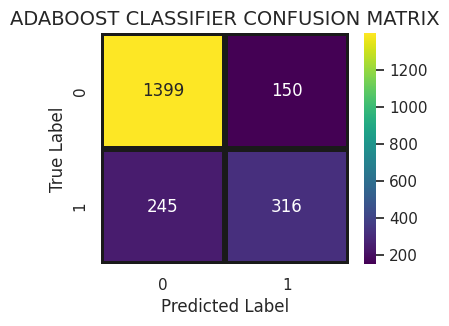

In [ ]:
# Ensure predictions exist
a_preds = a_model.predict(X_test)

# Generate confusion matrix (same numeric result)
cm = confusion_matrix(y_test, a_preds)

# Convert to DataFrame to keep structure consistent
cm_df = pd.DataFrame(cm)

# Visualize with same formatting style
plt.figure(figsize=(4,3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis',  # visually similar to seaborn default
            linecolor='k', linewidths=3)

plt.title("ADABOOST CLASSIFIER CONFUSION MATRIX", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Gradient Boosting Classifier**

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train (fit) the model using the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = gb_model.predict(X_test)

# Display accuracy
print("Gradient Boosting Classifier accuracy")
metrics.accuracy_score(y_test, gb_preds)


Gradient Boosting Classifier accuracy


0.8075829383886256

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model using the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Display the classification report (precision, recall, f1-score, accuracy)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



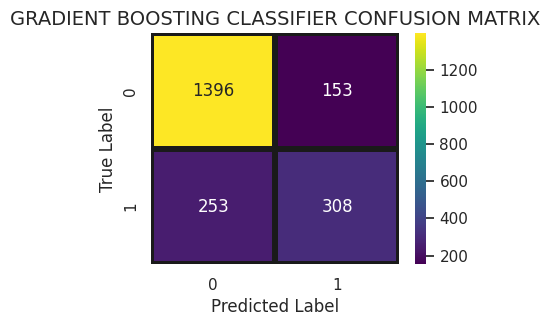

In [ ]:
# Ensure predictions exist
gb_pred = gb_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, gb_pred)

# Convert to DataFrame
cm_df = pd.DataFrame(cm)

# Visualize
plt.figure(figsize=(4,3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis',
            linecolor='k', linewidths=3)

plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Voting Classifier**

Next, I’ll generate the final prediction based on the majority of model votes and measure its accuracy.

In [ ]:
# Import required libraries
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize individual models
gb_model = GradientBoostingClassifier()
lr_model = LogisticRegression()
ab_model = AdaBoostClassifier()

# Create a soft voting ensemble classifier
voting_model = VotingClassifier(
    estimators=[
        ('Gradient Boosting', gb_model),
        ('Logistic Regression', lr_model),
        ('AdaBoost', ab_model)
    ],
    voting='soft'
)

# Train the ensemble model
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_model.predict(X_test)

# Evaluate accuracy
voting_accuracy = accuracy_score(y_test, y_pred_voting)

# Display results
round(voting_accuracy, 4)



0.8175

In [ ]:
# Define a function to display the classification report
def show_classification_result(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Show classification report for the Voting Classifier predictions
show_classification_result(y_test, y_pred_voting)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.57      0.62       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



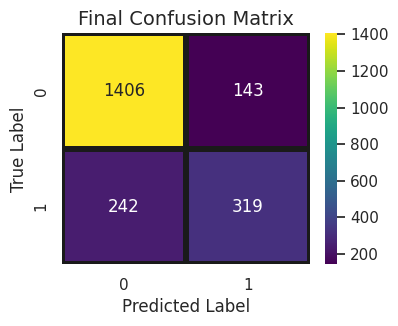

In [ ]:
# Generate confusion matrix for Voting Classifier predictions
cm = confusion_matrix(y_test, y_pred_voting)

# Convert confusion matrix to DataFrame (for readability)
cm_df = pd.DataFrame(cm)

# Visualize the confusion matrix (same numeric result)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df, annot=True, fmt='d',
            linecolor='k', linewidths=3, cmap='viridis')

plt.title("Final Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> According to the confusion matrix, there are a total of 1,549 actual non-churn cases (1,406 + 143).
The model correctly predicts 1,406 of these as non-churn and misclassifies 143 as churn.
Among the 561 actual churn cases (242 + 319), the model incorrectly labels 242 as non-churn and correctly identifies 319 as churn.

# Conclusion

From a company’s perspective, customer churn is critical to profitability.
To reduce the churn rate, it is important to identify customers who are at risk of leaving.
Analyzing customer data to find the factors that drive churn and improving customer satisfaction are key steps in addressing the issue.